# Lab16: Transfer Learning Using Pre-trained Models in CNN

## Import Libraries 

In [28]:
import keras 
from keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from keras.layers import Dense,Activation, Flatten 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1

In [30]:
INPUT_SHAPE = (224,224,3)

# get the VGG19 model
model_vgg = VGG16(weights='imagenet',input_shape=INPUT_SHAPE)

model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [31]:
paths = glob.glob('/content/drive/MyDrive/PDL_Lab-16_pics/*')
for i in paths:
  image = Image.open(i)
  re_image = image.resize((224,224))
  re_image.save(i)

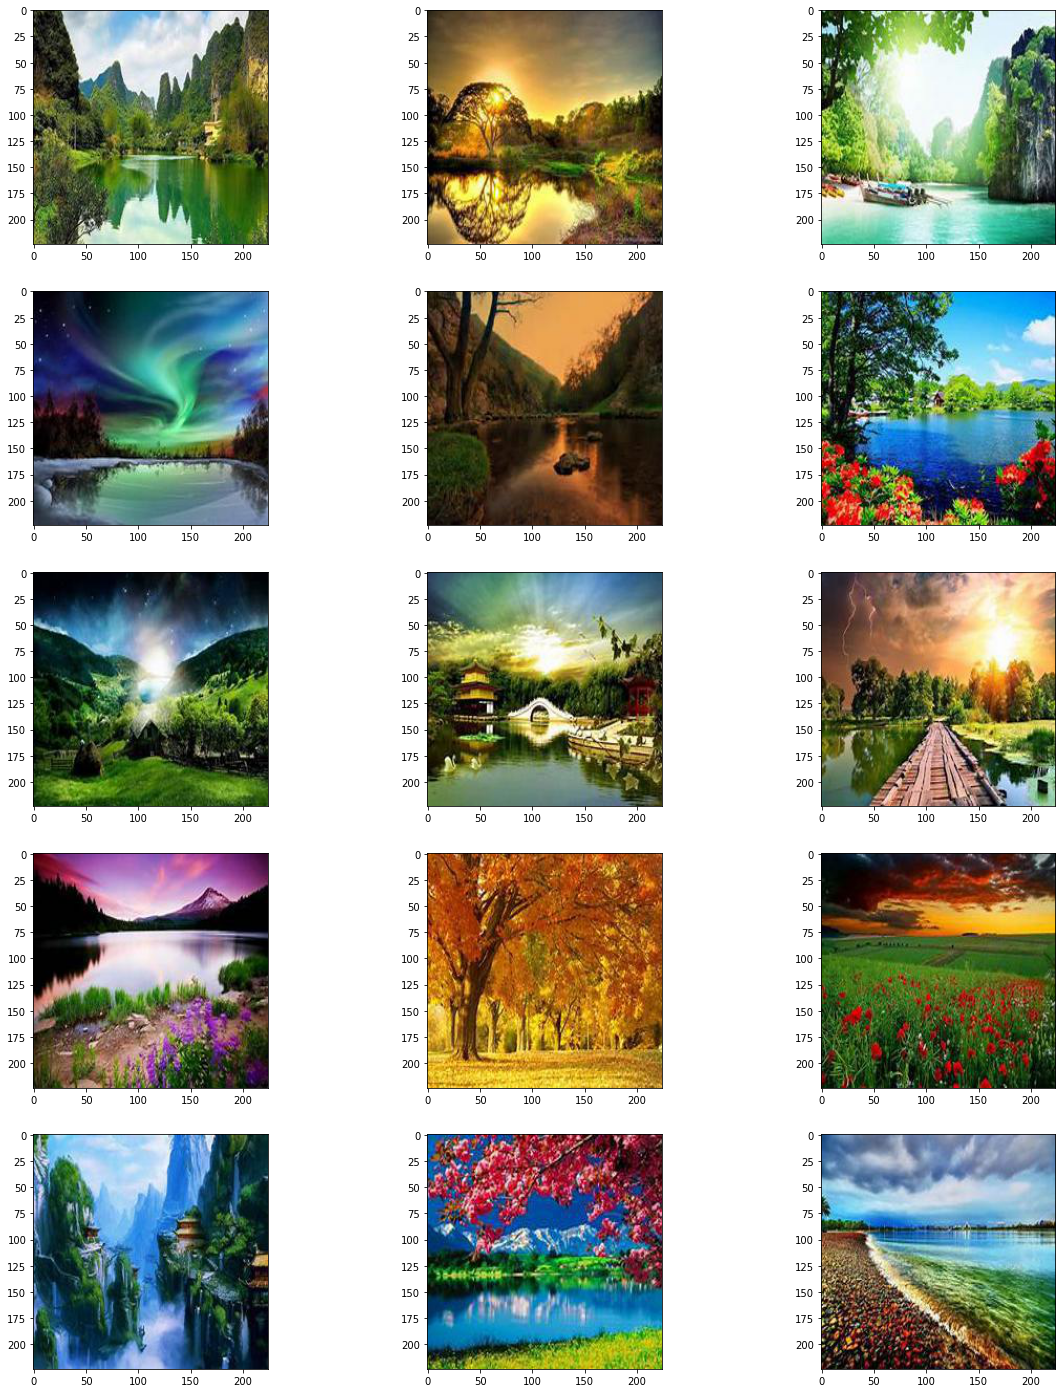

In [32]:
plt.figure(figsize=(20,25))
for i in range(len(paths)):
  plt.subplot(5,3,i+1)
  image = Image.open(paths[i])
  plt.imshow(image)

In [33]:
my_data=[]
for i in paths:
  image3 = load_img(i, target_size=(224, 224))
  image3 = img_to_array(image3)                                             # convert the image pixels to a numpy array
  image3 = image3.reshape((1, image3.shape[0], image3.shape[1], image3.shape[2]))          # reshape data for the model
  my_data.append(preprocess_input(image3))             # prepare the image for the VGG model

In [34]:
for j in my_data:
  predict_vgg = model_vgg.predict(j)
  label_vgg = decode_predictions(predict_vgg)
  x = np.expand_dims(label_vgg,axis=0)
  print(label_vgg)
  print(x)
  print('\n')

[[('n09468604', 'valley', 0.46232212), ('n02980441', 'castle', 0.3020689), ('n09332890', 'lakeside', 0.10485658), ('n02859443', 'boathouse', 0.034676738), ('n09193705', 'alp', 0.027073575)]]
[[[['n09468604' 'valley' '0.46232212']
   ['n02980441' 'castle' '0.3020689']
   ['n09332890' 'lakeside' '0.10485658']
   ['n02859443' 'boathouse' '0.034676738']
   ['n09193705' 'alp' '0.027073575']]]]


[[('n03388043', 'fountain', 0.47616422), ('n02980441', 'castle', 0.15961799), ('n09472597', 'volcano', 0.025457269), ('n09468604', 'valley', 0.02165951), ('n03877845', 'palace', 0.01950772)]]
[[[['n03388043' 'fountain' '0.47616422']
   ['n02980441' 'castle' '0.15961799']
   ['n09472597' 'volcano' '0.025457269']
   ['n09468604' 'valley' '0.02165951']
   ['n03877845' 'palace' '0.01950772']]]]


[[('n09332890', 'lakeside', 0.5330821), ('n09468604', 'valley', 0.1990522), ('n02980441', 'castle', 0.07358655), ('n02859443', 'boathouse', 0.051588748), ('n09246464', 'cliff', 0.028179018)]]
[[[['n09332890' 'l

## Part 2

In [35]:
# load model
model_rn = ResNet50(weights='imagenet')

# summarize the model
model_rn.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [36]:
for j in my_data:
  predict_rs = model_rn.predict(j)
  label_rs = decode_predictions(predict_rs)
  print(label_rs)
  print('\n')

[[('n09468604', 'valley', 0.8457492), ('n09332890', 'lakeside', 0.046383224), ('n02951358', 'canoe', 0.046113607), ('n02980441', 'castle', 0.024964357), ('n09193705', 'alp', 0.021470357)]]


[[('n02980441', 'castle', 0.20340738), ('n09468604', 'valley', 0.11121617), ('n09428293', 'seashore', 0.11011982), ('n09332890', 'lakeside', 0.10475598), ('n02951358', 'canoe', 0.09943991)]]


[[('n09468604', 'valley', 0.35254192), ('n09332890', 'lakeside', 0.32299984), ('n02951358', 'canoe', 0.18245731), ('n03388043', 'fountain', 0.032955974), ('n09246464', 'cliff', 0.021493036)]]


[[('n03782006', 'monitor', 0.24016225), ('n09332890', 'lakeside', 0.20596877), ('n03388043', 'fountain', 0.16730313), ('n03956157', 'planetarium', 0.07670127), ('n02980441', 'castle', 0.037751723)]]


[[('n09468604', 'valley', 0.91516507), ('n02980441', 'castle', 0.021670973), ('n09332890', 'lakeside', 0.019390605), ('n04532670', 'viaduct', 0.011288619), ('n02859443', 'boathouse', 0.008311514)]]


[[('n09332890', 'lake

In [37]:
predict_rs = model_rn.predict(my_data[0])
label_rs = decode_predictions(predict_rs)
label_rs

[[('n09468604', 'valley', 0.8457492),
  ('n09332890', 'lakeside', 0.046383224),
  ('n02951358', 'canoe', 0.046113607),
  ('n02980441', 'castle', 0.024964357),
  ('n09193705', 'alp', 0.021470357)]]

In [38]:
label_rs[0][3]

('n02980441', 'castle', 0.024964357)

## Part 4

In [49]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img_data_gen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

image5 = load_img('/content/drive/MyDrive/PDL_Lab-16_pics/n-3.jpg')  # this is a PIL image
x3 = img_to_array(image5)  # this is a Numpy array with shape (3, 150, 150)
x3 = x3.reshape((1,) + x3.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in img_data_gen.flow(x3, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/PDL_Lab-16_pics', save_prefix='image', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [50]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D())
# the model so far outputs 3D feature maps (height, width, features)
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(5))
model.add(Activation('softmax'))

In [51]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [52]:
batch_size = 32

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_imgdatagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/PDL_Lab-16_pics',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_imgdatagen.flow_from_directory(
        '/content/drive/MyDrive/PDL_Lab-16_pics',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
